# Setup Notebook:

In [189]:
import numpy as np
from numpy import sqrt, abs, round
from sklearn import datasets
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , classification_report , confusion_matrix , roc_curve , auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

# Load Data:

In [190]:
data = datasets.load_breast_cancer()

In [191]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [192]:
data["DESCR"]

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [193]:
data["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [194]:
data["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [195]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [196]:
data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

# Create A Pandas DataFrame From The Data:

In [197]:
df = pd.DataFrame(data["data"] , columns = data["feature_names"])

In [198]:
df["target"] = data["target"]

In [199]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0        17.99         10.38          122.80     1001.0          0.11840  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry   
0           0.27760          0.3001              0.14710         0.2419  \
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area   
0                 0.07871  ...          17.33           184.60      2019.0  \
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points   
0            0.1622             0.6656           0.7119                0.2654  \
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Basic Descriptive Statistics:

In [201]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [202]:
df.describe()

mean radius  mean texture  mean perimeter    mean area   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture   
count     569.000000              569.000000  ...     569.000000  \
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness   
count       569.000000   569.000000        569.000000         569.000000  \
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry   
count       569.000000            569.000000      569.000000  \
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [203]:
df.shape

(569, 31)

# X And Y Lables:

In [204]:
x = df.drop(columns = "target").copy()
y = df["target"]

# Exploratory Data Analisys (EDA) - Pairplots:

In [205]:
# sns.pairplot(df , hue = "target")

<Axes: >

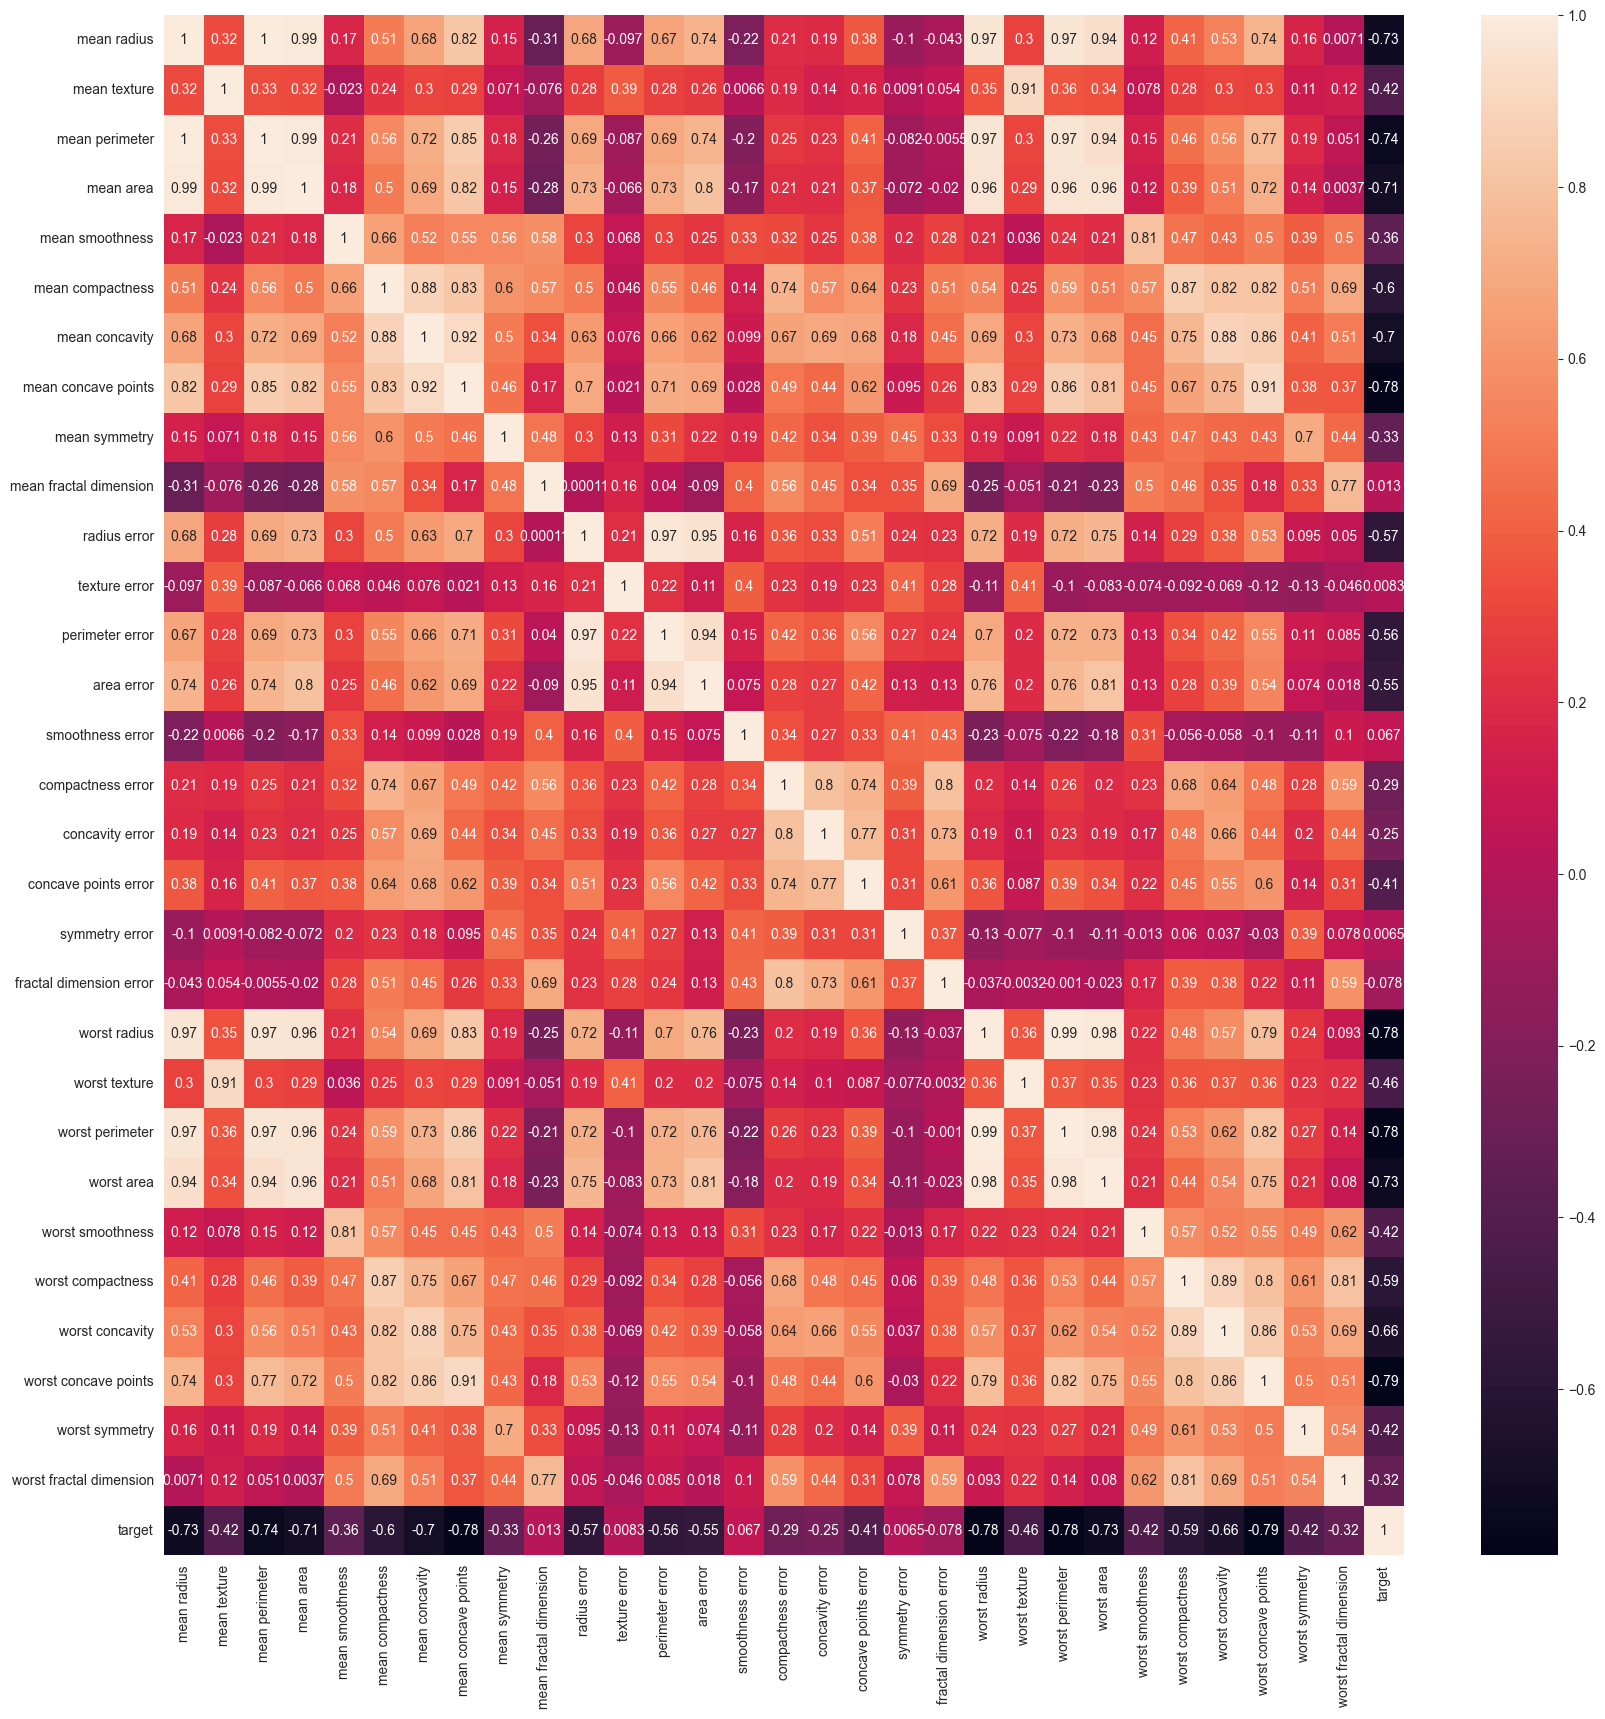

In [206]:
plt.figure(figsize = (20 , 20))
sns.heatmap(df.corr() , annot = True)

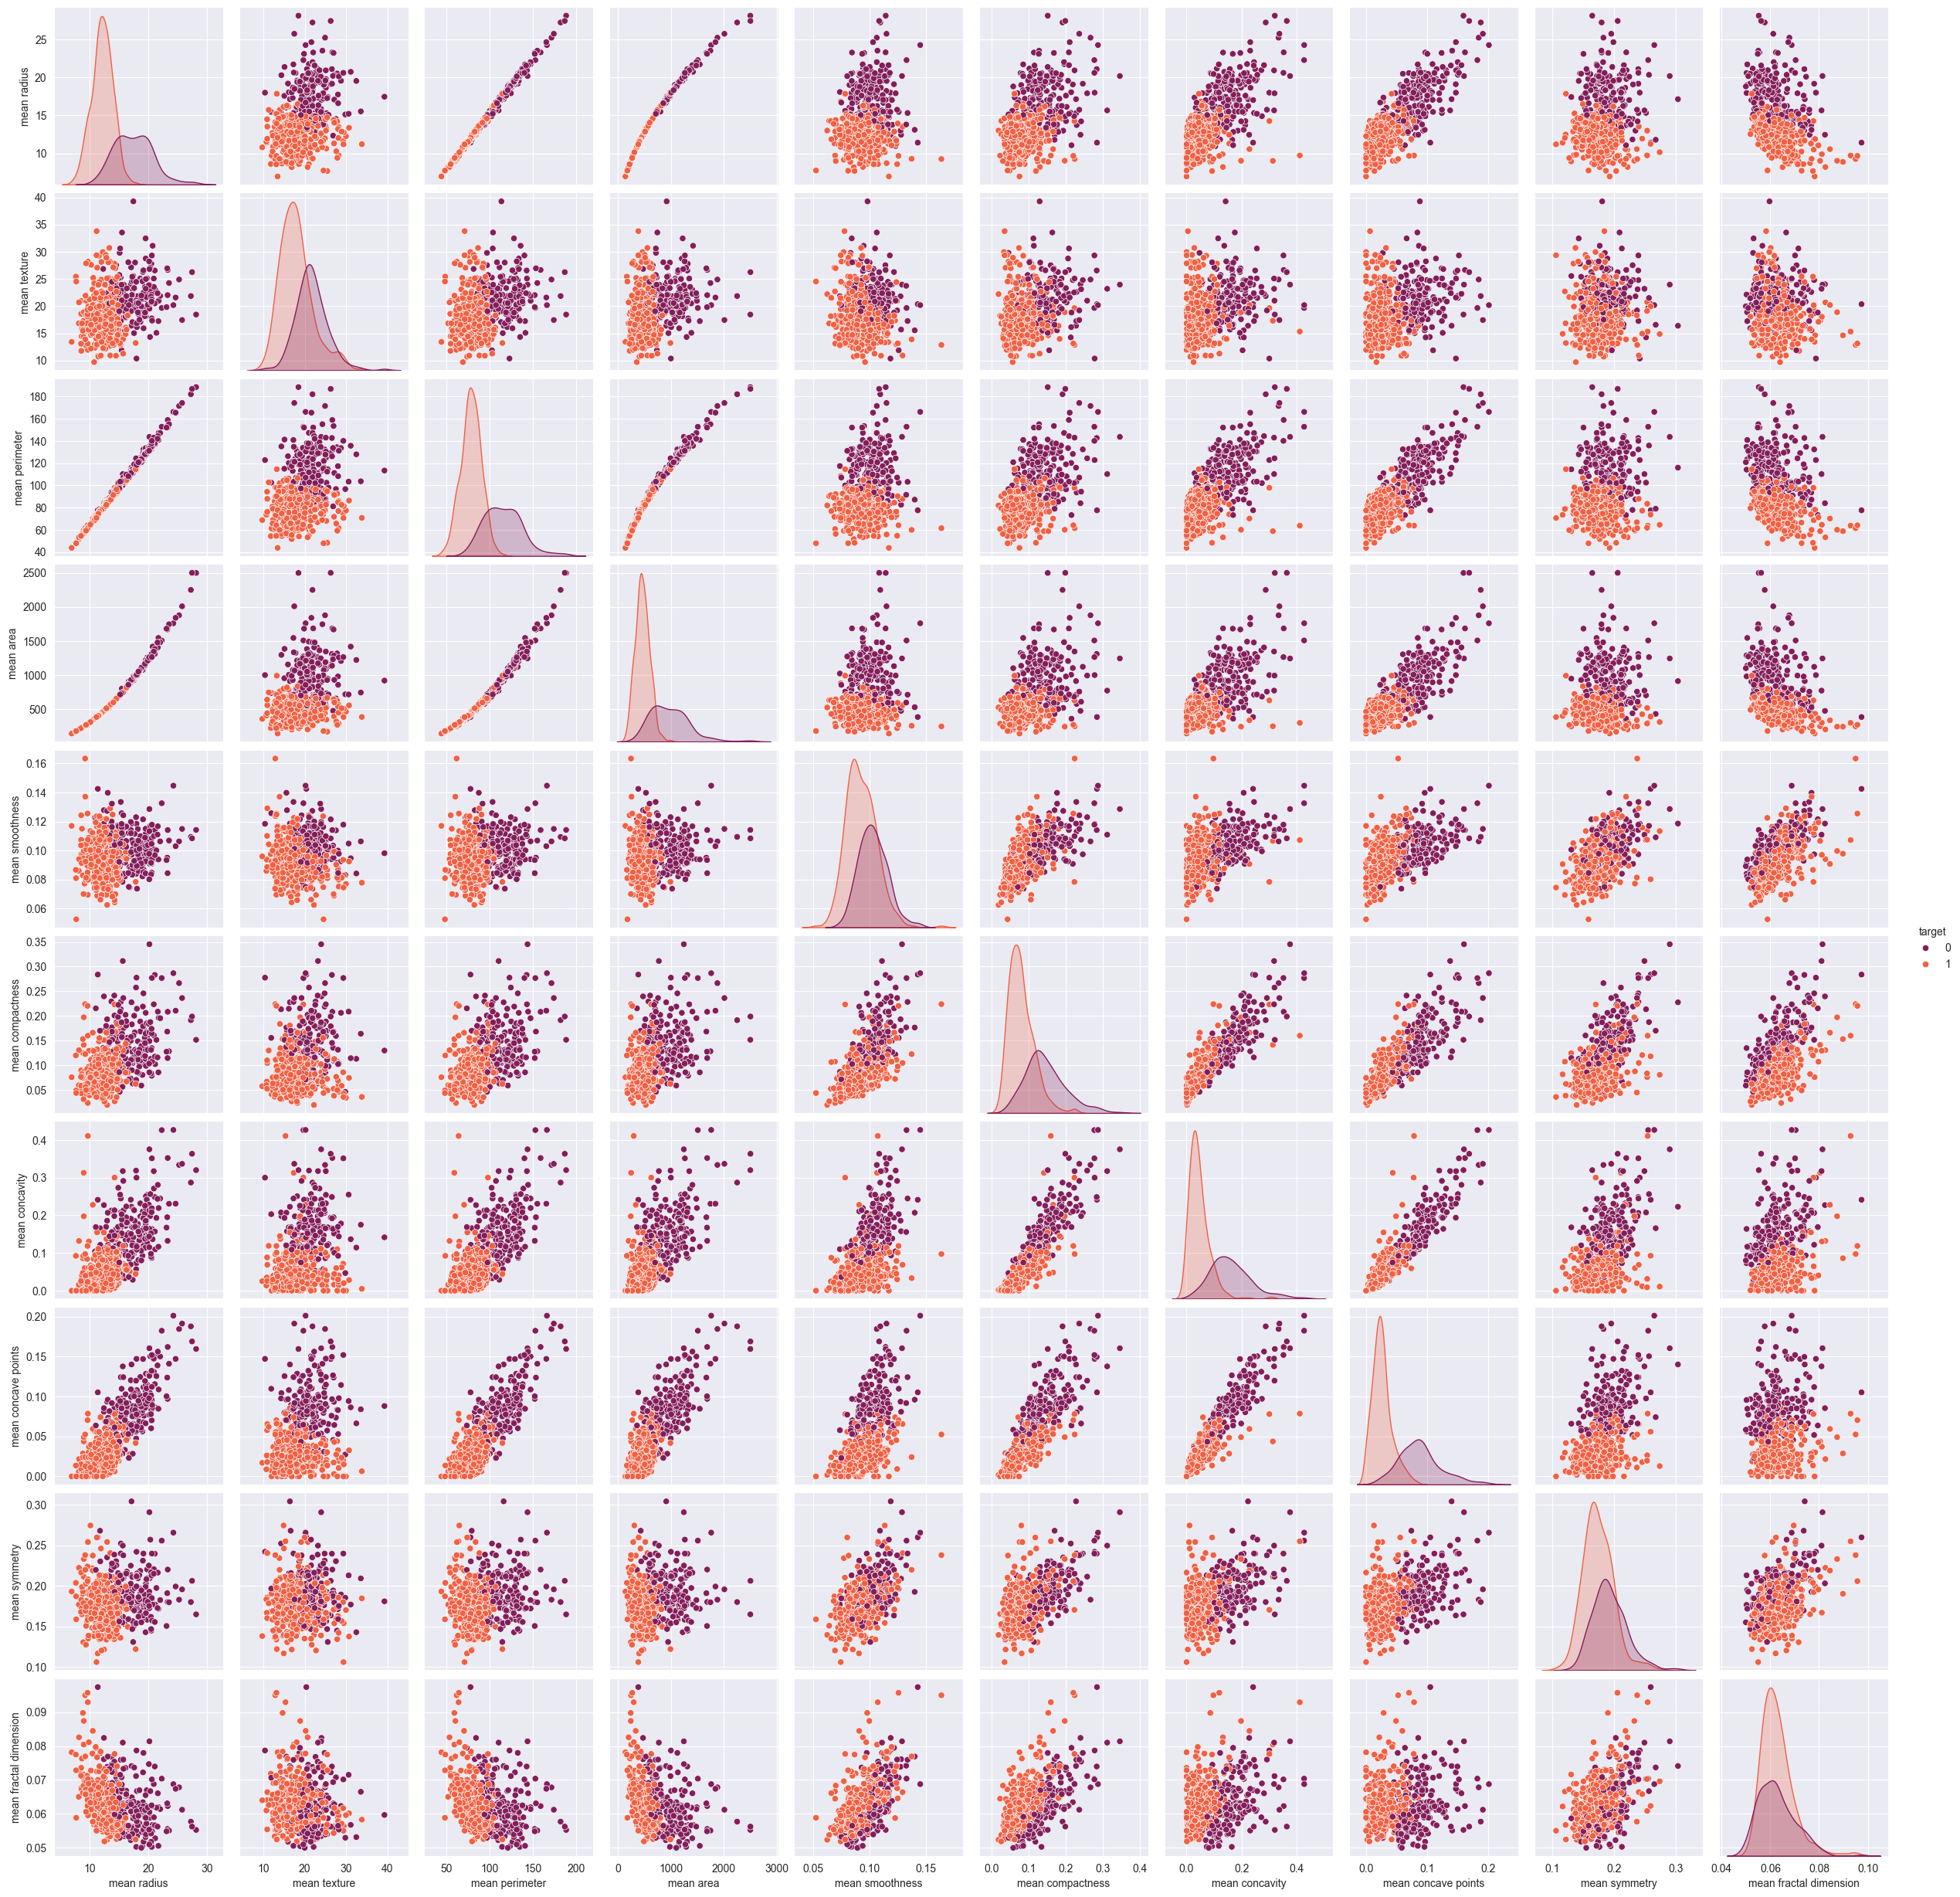

In [207]:
# Generate A Scatter Plot Matrix With The "mean" Columns.
cols = ['target' ,
        'mean radius' ,
        'mean texture' ,
        'mean perimeter' ,
        'mean area' ,
        'mean smoothness' ,
        'mean compactness' ,
        'mean concavity' ,
        'mean concave points' ,
        'mean symmetry' ,
        'mean fractal dimension']

sns.pairplot(data = df[cols] , hue = "target" , palette = "rocket")

In [208]:
data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [209]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0          17.99         10.38          122.80     1001.0          0.11840  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry   
0             0.27760         0.30010              0.14710         0.2419  \
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area   
0                   0.07871  ...          17.33           184.60      2019.0  \
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity   
0             0.16220            0.66560           0.7119  \
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

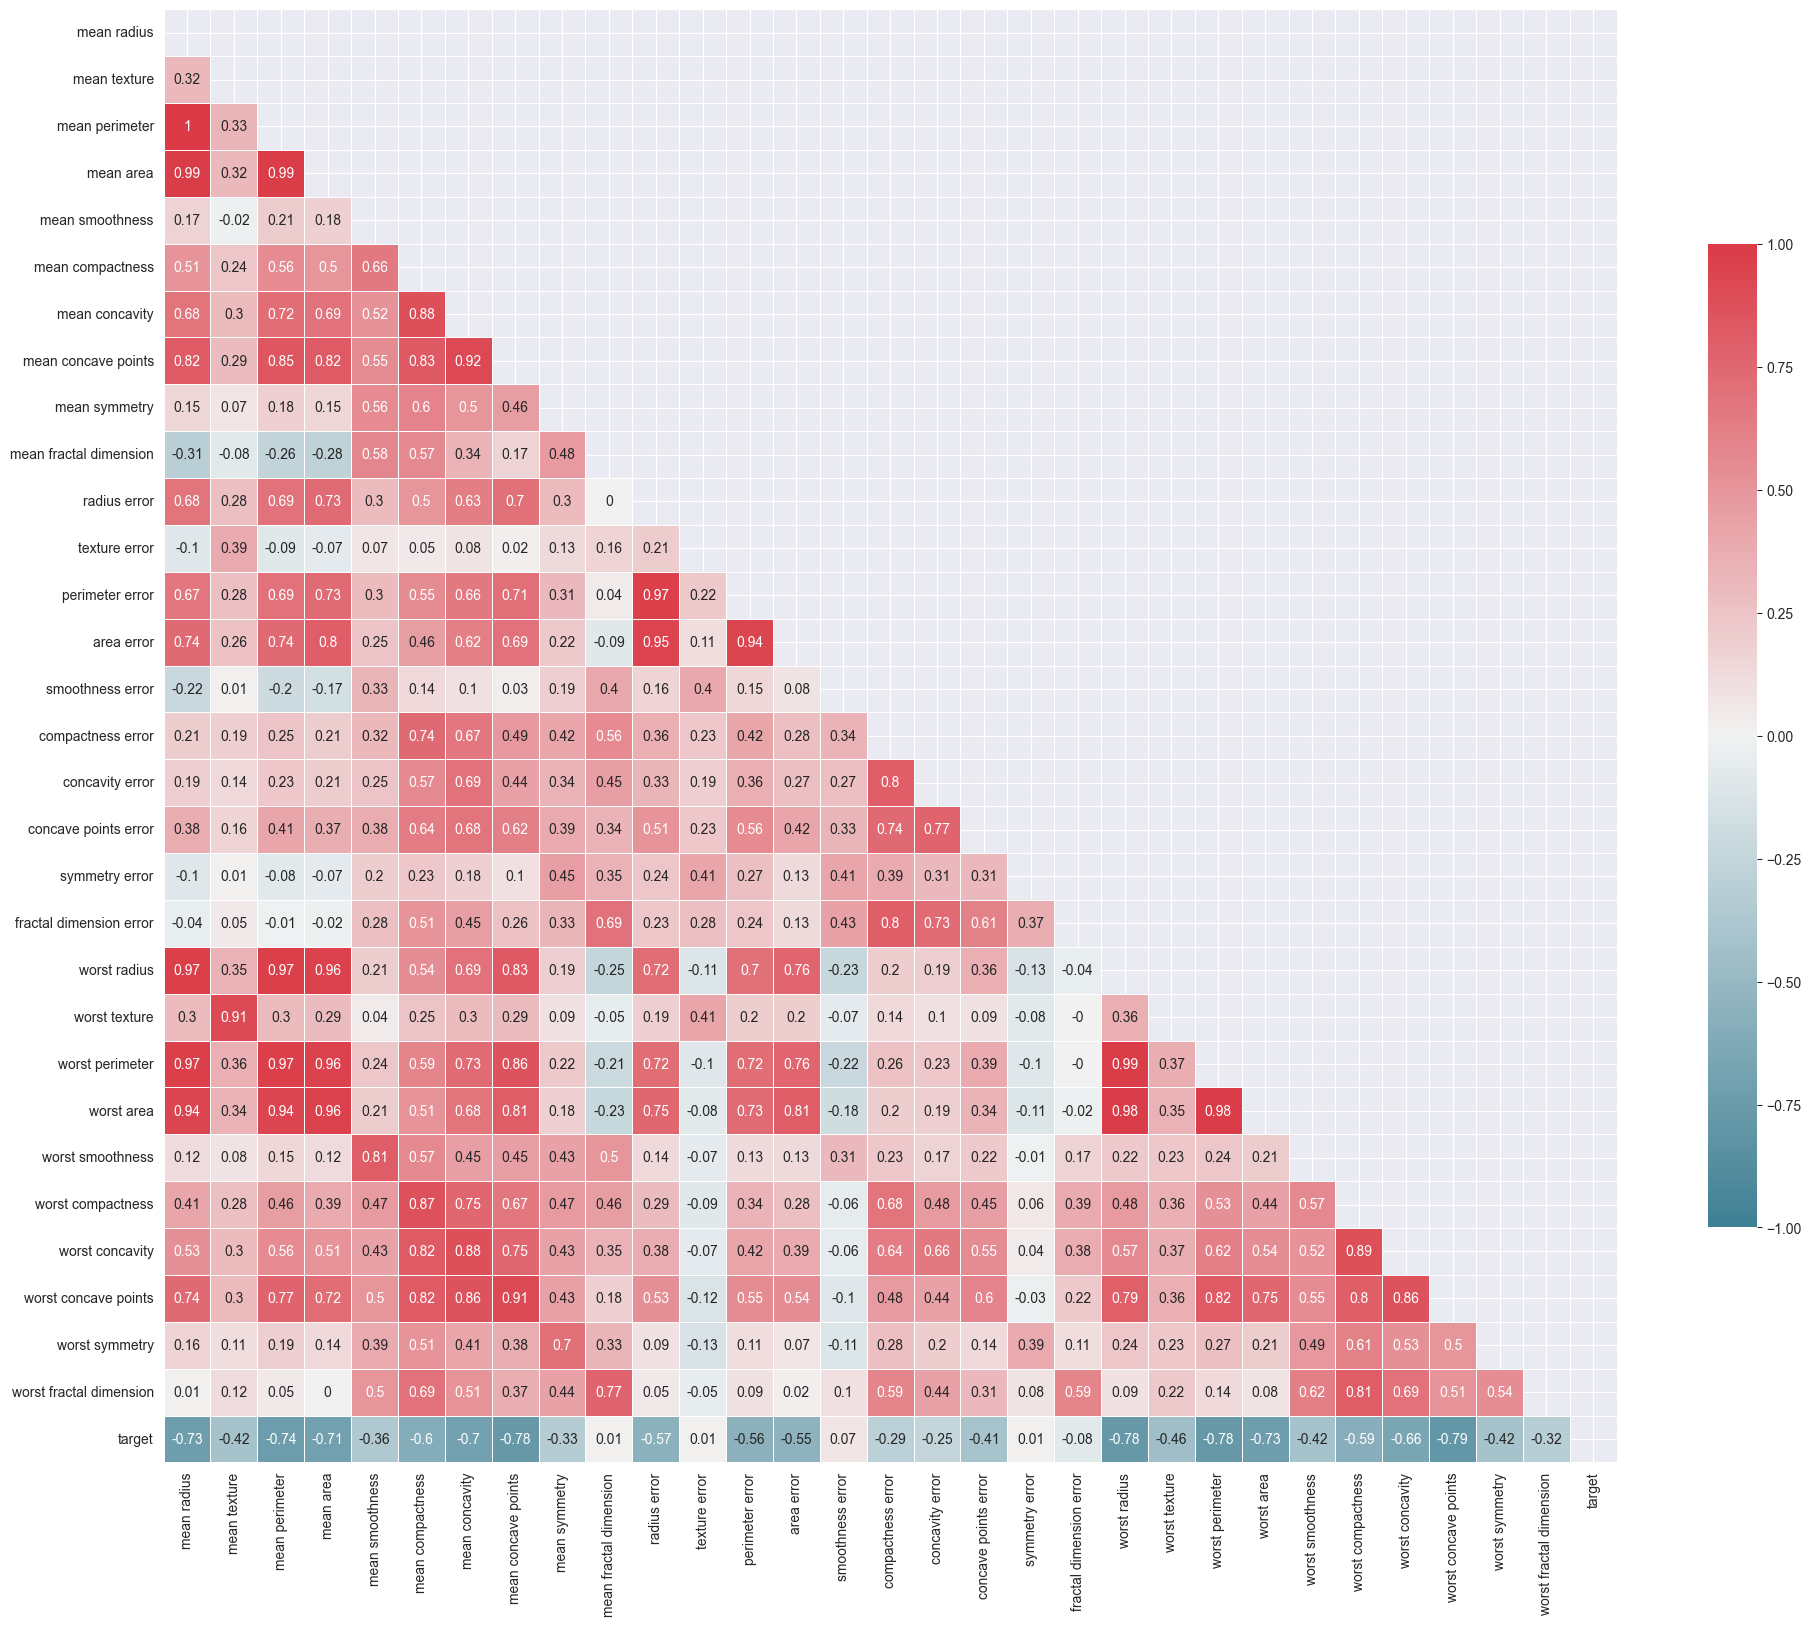

In [210]:
# Generate And Visualize The Correlation Matrix.
corr = df.corr().round(2)

# Mask For The Upper Triangle.
mask = np.zeros_like(corr , dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set Figure Size.
f , ax = plt.subplots(figsize = (20 , 20))

# Define Custom Colormap.
cmap = sns.diverging_palette(220 , 10 , as_cmap = True)

# Draw The Heatmap.
sns.heatmap(corr , mask = mask , cmap = cmap , vmin = -1 , vmax = 1 , center = 0 ,
            square = True , linewidths = 0.5 , cbar_kws = {"shrink" : 0.5} , annot = True)

plt.tight_layout()

In [211]:
# First , Drop All "worst" Columns.
cols = ['worst radius' ,
        'worst texture' ,
        'worst perimeter' ,
        'worst area' ,
        'worst smoothness' ,
        'worst compactness' ,
        'worst concavity' ,
        'worst concave points' ,
        'worst symmetry' ,
        'worst fractal dimension']
df = df.drop(cols , axis = 1)

# Then , Drop All Columns Related To The "perimeter" And "area" Attributes.
cols = ['mean perimeter' ,
        'perimeter error' ,
        'mean area' ,
        'area error']
df = df.drop(cols , axis = 1)

# Lastly , Drop All Columns Related To The "concavity" And "concave points" Attributes.
cols = ['mean concavity' ,
        'concavity error' ,
        'mean concave points' ,
        'concave points error']
df = df.drop(cols , axis = 1)

# Verify Remaining Columns.
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error', 'target'],
      dtype='object')

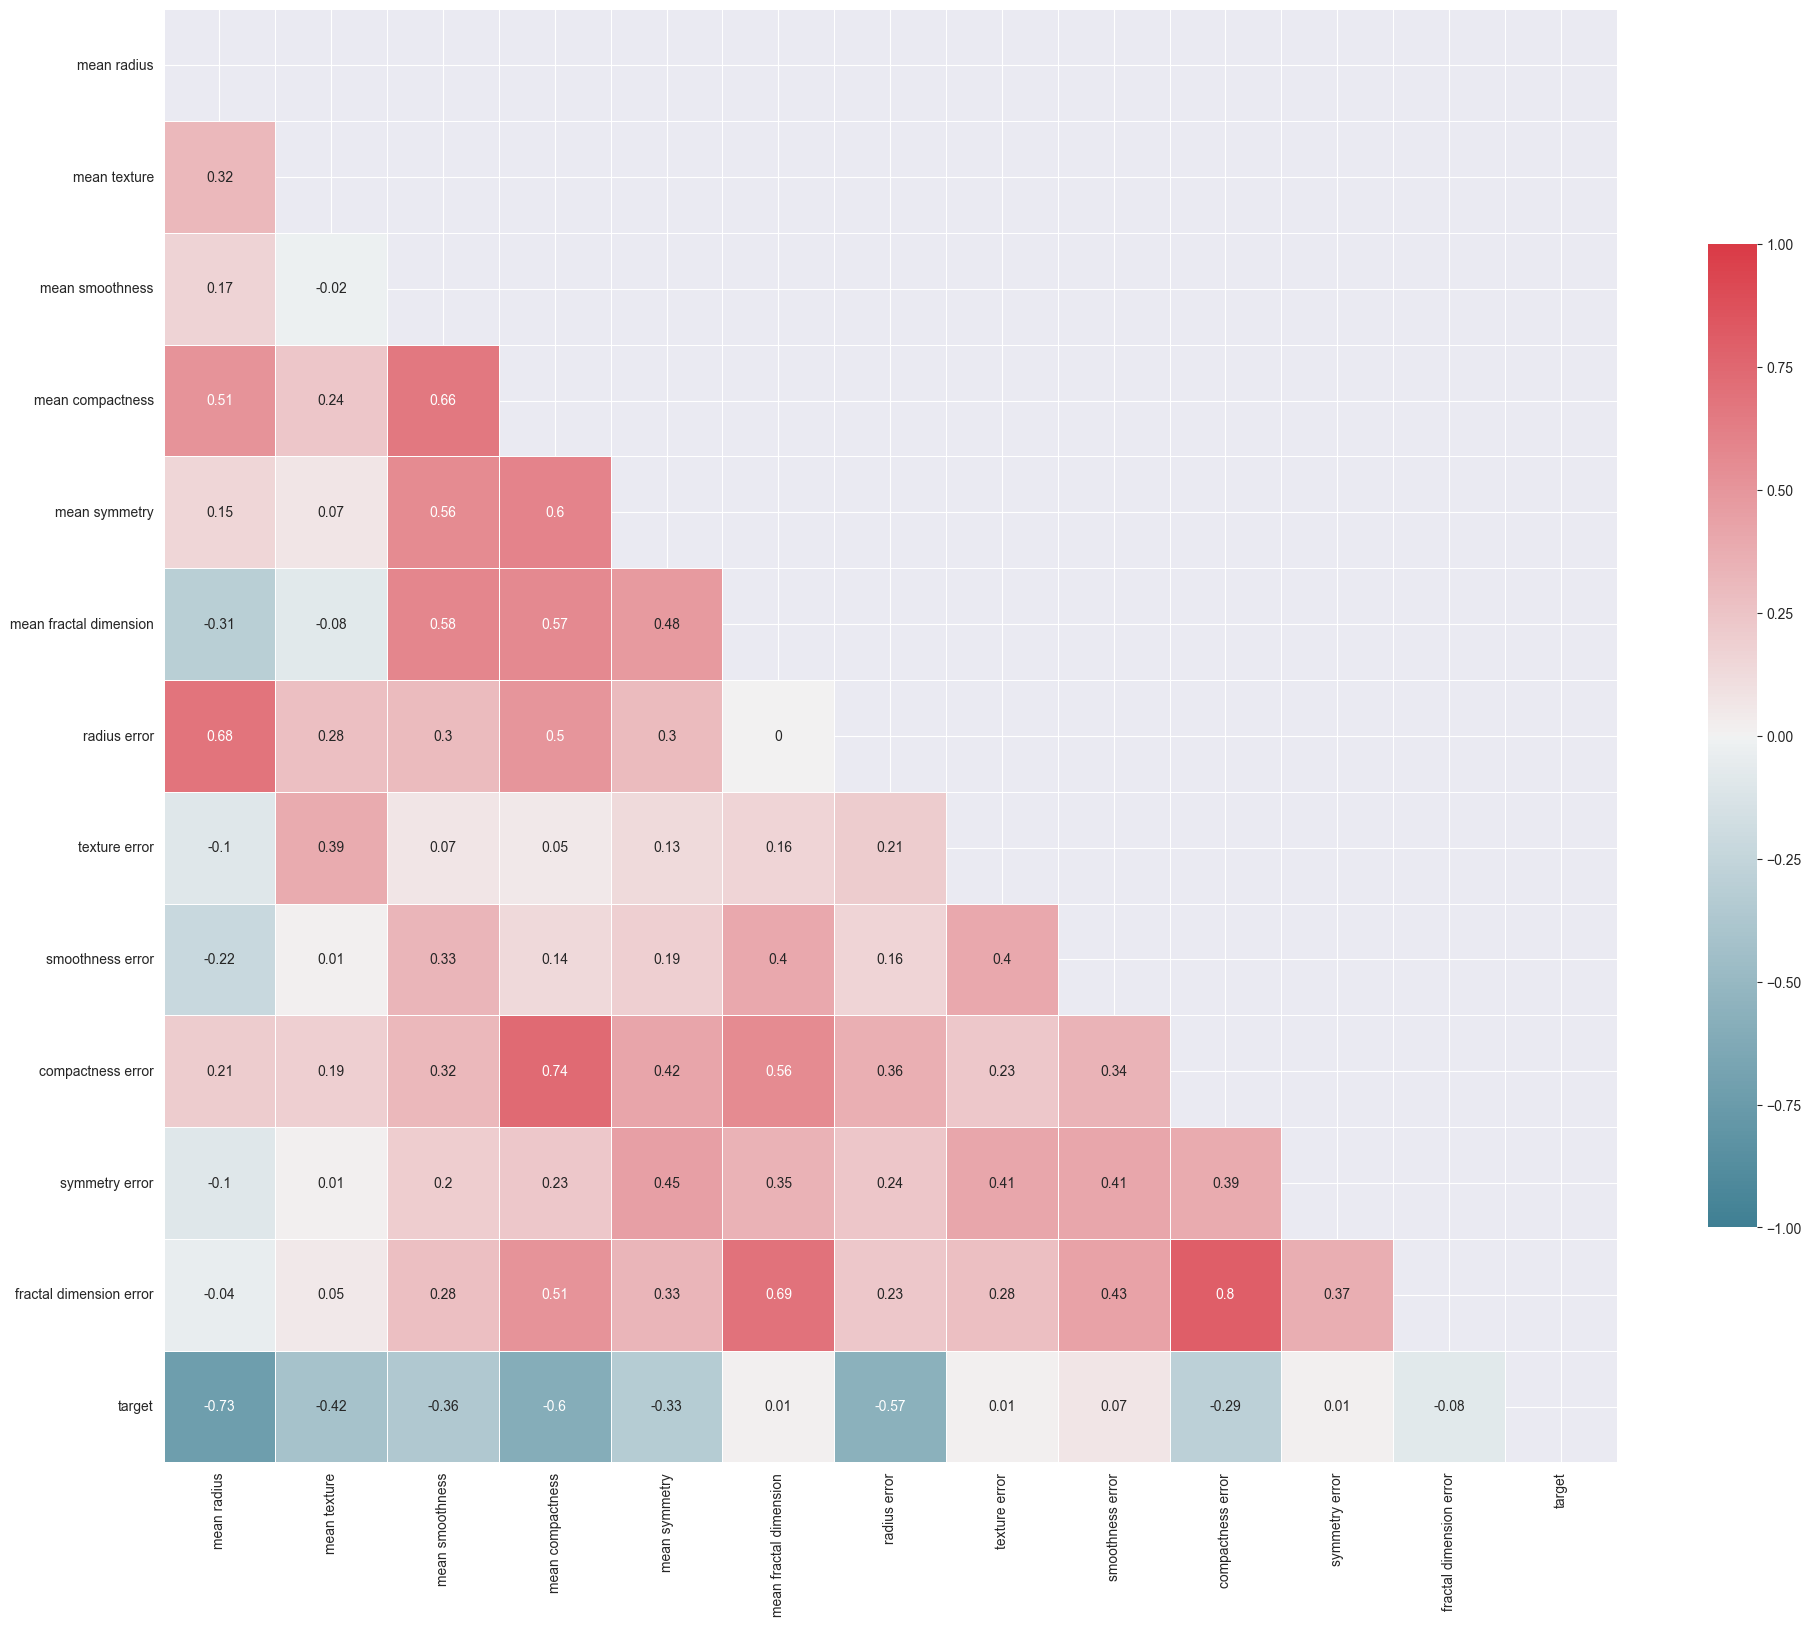

In [212]:
# Draw The Heatmap Again , With The New Correlation Matrix.
# Generate And Visualize The Correlation Matrix.
corr = df.corr().round(2)

# Mask For The Upper Triangle.
mask = np.zeros_like(corr , dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set Figure Size.
f , ax = plt.subplots(figsize = (20 , 20))

# Define Custom Colormap.
cmap = sns.diverging_palette(220 , 10 , as_cmap = True)

# Draw The Heatmap.
sns.heatmap(corr , mask = mask , cmap = cmap , vmin = -1 , vmax = 1 , center = 0 ,
            square = True , linewidths = 0.5 , cbar_kws = {"shrink" : 0.5} , annot = True)

plt.tight_layout()

In [213]:
# Create New Column With the Species Name
#df["target_name"] = df["target"].map({0 : "malignant" , 1 : "benign"})

In [214]:
df

mean radius  mean texture  mean smoothness  mean compactness   
0          17.99         10.38          0.11840           0.27760  \
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean symmetry  mean fractal dimension  radius error  texture error   
0           0.2419                 0.07871        1.0950         0.9053  \
1           0.1812                 0.05667        0.5435         0.7339   
2           0.2069                 0.05999        0.7456         0.7869   
3           0.2597                 0.09744        0.4956         1.1560   
4           0.1809                 0.05883        0.7572         0.7813   
..             ...                     ...           ...            ...   
564         0.1726                 0.05623        1.1760         1.2560   
565         0.1752                 0.05533        0.7655         2.4630   
566         0.1590                 0.05648        0.4564         1.0750   
567         0.2397                 0.07016        0.7260         1.5950   
568         0.1587                 0.05884        0.3857         1.4280   

     smoothness error  compactness error  symmetry error   
0            0.006399            0.04904         0.03003  \
1            0.005225            0.01308         0.01389   
2            0.006150            0.04006         0.02250   
3            0.009110            0.07458         0.05963   
4            0.011490            0.02461         0.01756   
..                ...                ...             ...   
564          0.010300            0.02891         0.01114   
565          0.005769            0.02423         0.01898   
566          0.005903            0.03731         0.01318   
567          0.006522            0.06158         0.02324   
568          0.007189            0.00466         0.02676   

     fractal dimension error  target  
0                   0.006193       0  
1                   0.003532       0  
2                   0.004571       0  
3                   0.009208       0  
4                   0.005115       0  
..                       ...     ...  
564                 0.004239       0  
565                 0.002498       0  
566                 0.003892       0  
567                 0.006185       0  
568                 0.002783       1  

[569 rows x 13 columns]

# T-Test Filtering

In [215]:
def twoSampT(x1, x2, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1 ** 2 / n1 + sd2 ** 2 / n2)
    t_test = (x1 - x2) / pooledSE
    p_value = 2 * (1 - norm.cdf(abs(t_test)))
    return round(t_test , 3) , p_value

In [216]:
cols = ['mean radius' ,
        'mean texture' ,
        'mean smoothness' ,
        'mean compactness' ,
        'mean symmetry' ,
        'mean fractal dimension' ,
        'radius error' ,
        'texture error' ,
       'smoothness error' ,
       'compactness error' ,
       'symmetry error' ,
       'fractal dimension error']

In [217]:
p_values = {}
for feature in cols:
    # Filter the dataset for the two species we want to compare:
    malignant_mean = df.loc[df['target'] == 0 , feature].mean()
    benign_mean = df.loc[df['target'] == 1 , feature].mean()
    malignant_std = df.loc[df['target'] == 0 , feature].std()
    benign_std = df.loc[df['target'] == 1 , feature].std()
    no_of_malignant = df.loc[df['target'] == 0 , feature].count()
    no_of_benign = df.loc[df['target'] == 1 , feature].count()
    
    # Perform the t-test:
    t_test , p_value = twoSampT(malignant_mean ,benign_mean , malignant_std , benign_std , no_of_malignant , no_of_benign)
    print('T-Test =' , t_test ,'P-Value =' , p_value)
    
    # Interpret the results:
    if p_value < 0.025:
        p_values[feature] = p_value
        print(f"we reject null hypothesis for feature {feature}")
    else:
        df = df.drop(feature , axis = 1)
        print(f"we accept null hypothesis for feature {feature}")


T-Test = 22.209 P-Value = 0.0
we reject null hypothesis for feature mean radius
T-Test = 11.022 P-Value = 0.0
we reject null hypothesis for feature mean texture
T-Test = 9.297 P-Value = 0.0
we reject null hypothesis for feature mean smoothness
T-Test = 15.818 P-Value = 0.0
we reject null hypothesis for feature mean compactness
T-Test = 8.112 P-Value = 4.440892098500626e-16
we reject null hypothesis for feature mean symmetry
T-Test = -0.297 P-Value = 0.7665689002696578
we accept null hypothesis for feature mean fractal dimension
T-Test = 13.301 P-Value = 0.0
we reject null hypothesis for feature radius error
T-Test = -0.208 P-Value = 0.8353343609804973
we accept null hypothesis for feature texture error
T-Test = -1.623 P-Value = 0.10461735657236004
we accept null hypothesis for feature smoothness error
T-Test = 7.083 P-Value = 1.4144241333724494e-12
we reject null hypothesis for feature compactness error
T-Test = -0.142 P-Value = 0.8870364255851693
we accept null hypothesis for feature 

In [218]:
p_values

{'mean radius': 0.0,
 'mean texture': 0.0,
 'mean smoothness': 0.0,
 'mean compactness': 0.0,
 'mean symmetry': 4.440892098500626e-16,
 'radius error': 0.0,
 'compactness error': 1.4144241333724494e-12}

In [219]:
df

mean radius  mean texture  mean smoothness  mean compactness   
0          17.99         10.38          0.11840           0.27760  \
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean symmetry  radius error  compactness error  target  
0           0.2419        1.0950            0.04904       0  
1           0.1812        0.5435            0.01308       0  
2           0.2069        0.7456            0.04006       0  
3           0.2597        0.4956            0.07458       0  
4           0.1809        0.7572            0.02461       0  
..             ...           ...                ...     ...  
564         0.1726        1.1760            0.02891       0  
565         0.1752        0.7655            0.02423       0  
566         0.1590        0.4564            0.03731       0  
567         0.2397        0.7260            0.06158       0  
568         0.1587        0.3857            0.00466       1  

[569 rows x 8 columns]

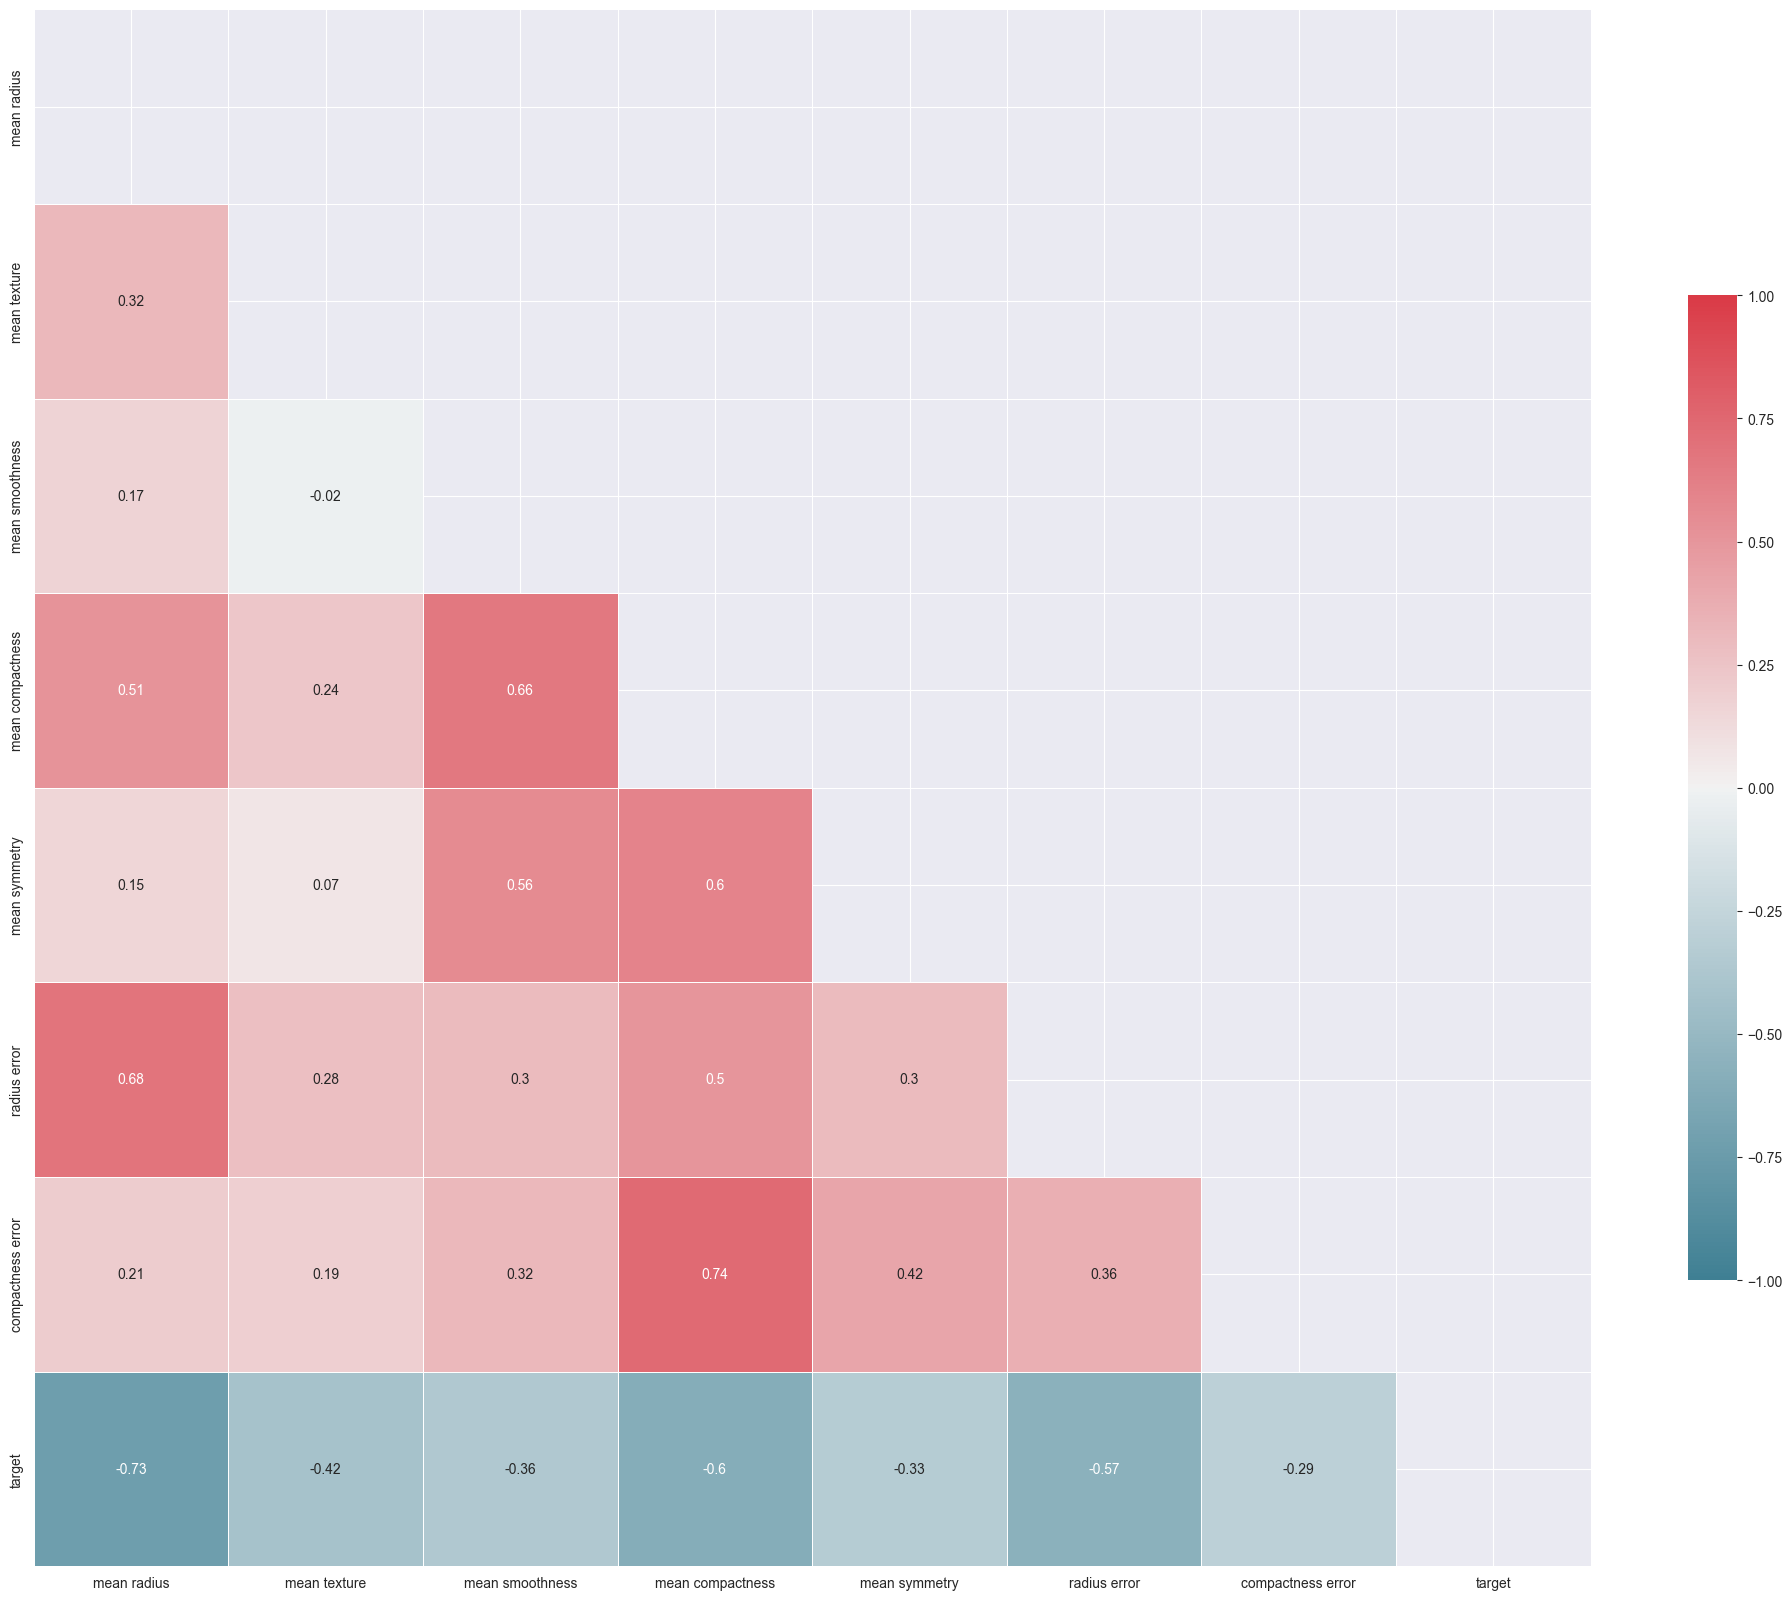

In [220]:
# Draw The Heatmap Again , With The New Correlation Matrix.
# Generate And Visualize The Correlation Matrix.
corr = df.corr().round(2)

# Mask For The Upper Triangle.
mask = np.zeros_like(corr , dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set Figure Size.
f , ax = plt.subplots(figsize = (20 , 20))

# Define Custom Colormap.
cmap = sns.diverging_palette(220 , 10 , as_cmap = True)

# Draw The Heatmap.
sns.heatmap(corr , mask = mask , cmap = cmap , vmin = -1 , vmax = 1 , center = 0 ,
            square = True , linewidths = 0.5 , cbar_kws = {"shrink" : 0.5} , annot = True)

plt.tight_layout()

# Train-Test Split:

In [221]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 33)

### Feature Scaling:

In [222]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

### Logistic Regression:

In [223]:
lr = LogisticRegression()

model1 = lr.fit(x_train , y_train)
y_test_pred1 = model1.predict(x_test)

cm = confusion_matrix(y_test , y_test_pred1)

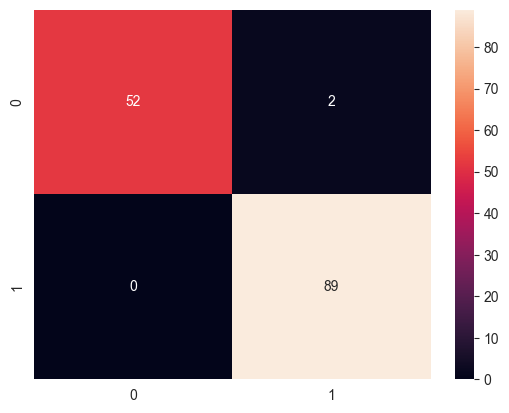

In [224]:
sns.heatmap(cm , annot = True)
plt.savefig("h.png")

In [225]:
accuracy = accuracy_score(y_test , y_test_pred1)
precision = precision_score(y_test , y_test_pred1 , average = 'weighted')
recall = recall_score(y_test , y_test_pred1 , average = 'weighted')
f1 = f1_score(y_test , y_test_pred1 , average = 'weighted')

In [226]:
report = classification_report(y_test , y_test_pred1 , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  98.60%
Precision =  98.63%
Recall =  98.60%
F1 - Score =  98.60%

Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.96      0.98        54
      benign       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



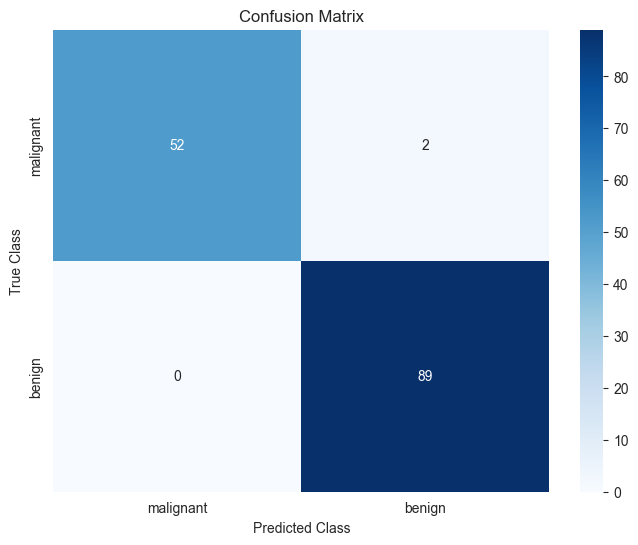

In [227]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Text(0.5, 0, 'False positive rate')

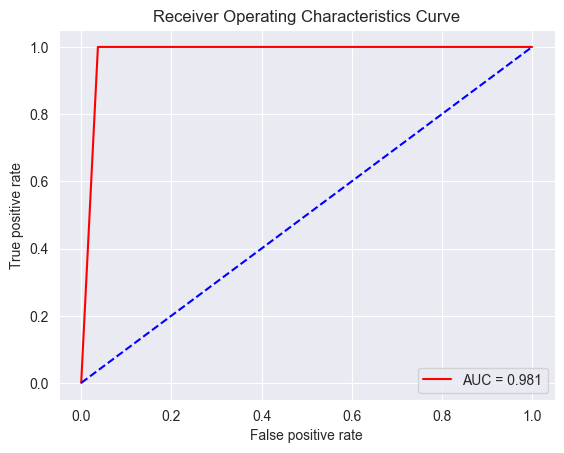

In [228]:
# Plotting The ROC curve

fpr,tpr, threshold = roc_curve(y_test , y_test_pred1)
roc_auc_ = auc(fpr,tpr)
plt.title('Receiver Operating Characteristics Curve')
plt.plot(fpr,tpr,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### Decision Tree:

In [229]:
dtc = DecisionTreeClassifier()

model2 = dtc.fit(x_train , y_train)
y_test_pred2 = model2.predict(x_test)

cm = confusion_matrix(y_test , y_test_pred2)

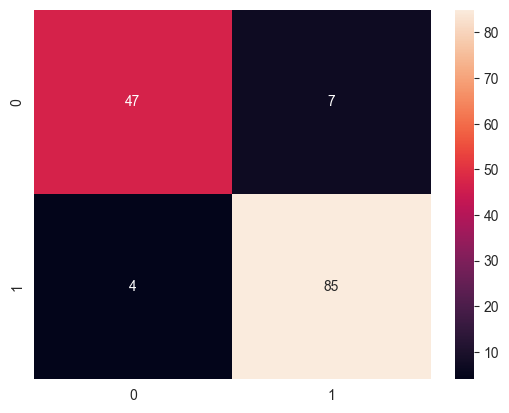

In [230]:
sns.heatmap(cm , annot = True)
plt.savefig("h.png")

In [231]:
accuracy = accuracy_score(y_test , y_test_pred2)
precision = precision_score(y_test , y_test_pred2 , average = 'weighted')
recall = recall_score(y_test , y_test_pred2 , average = 'weighted')
f1 = f1_score(y_test , y_test_pred2 , average = 'weighted')

In [232]:
report = classification_report(y_test , y_test_pred2 , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  92.31%
Precision =  92.30%
Recall =  92.31%
F1 - Score =  92.26%

Classification Report:
               precision    recall  f1-score   support

   malignant       0.92      0.87      0.90        54
      benign       0.92      0.96      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



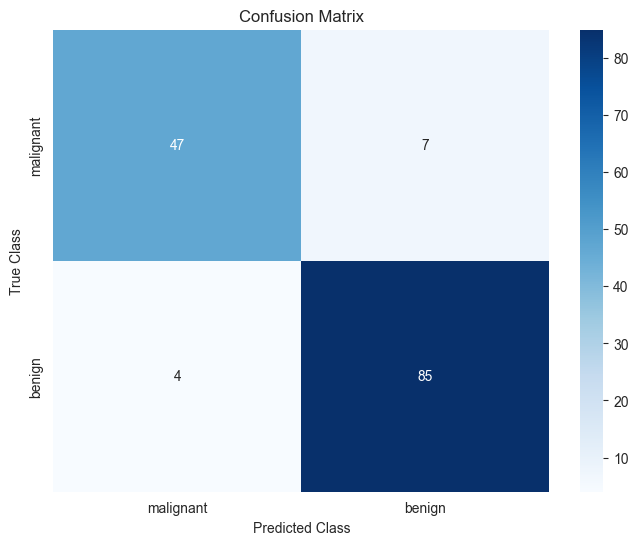

In [233]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Text(0.5, 0, 'False positive rate')

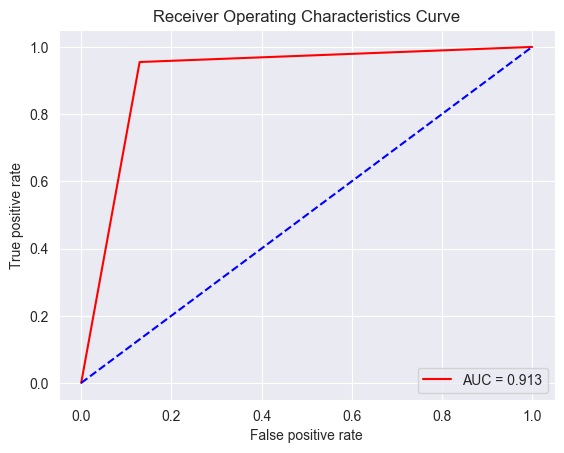

In [234]:
# Plotting The ROC curve

fpr,tpr, threshold = roc_curve(y_test , y_test_pred2)
roc_auc_ = auc(fpr,tpr)
plt.title('Receiver Operating Characteristics Curve')
plt.plot(fpr,tpr,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### Random Farest:

In [235]:
rfc = RandomForestClassifier()

model3 = rfc.fit(x_train , y_train)
y_test_pred3 = model3.predict(x_test)

cm = confusion_matrix(y_test , y_test_pred3)

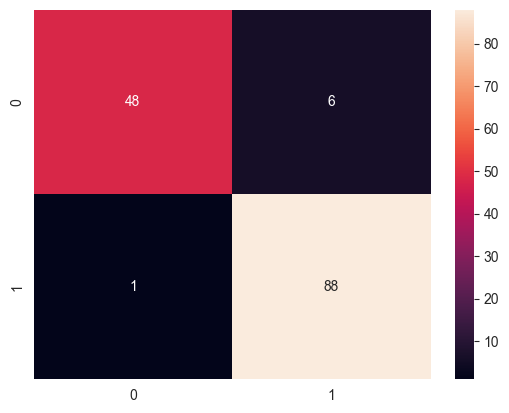

In [236]:
sns.heatmap(cm , annot = True)
plt.savefig("h.png")

In [237]:
accuracy = accuracy_score(y_test , y_test_pred3)
precision = precision_score(y_test , y_test_pred3 , average = 'weighted')
recall = recall_score(y_test , y_test_pred3 , average = 'weighted')
f1 = f1_score(y_test , y_test_pred3 , average = 'weighted')

In [238]:
report = classification_report(y_test , y_test_pred3 , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  95.10%
Precision =  95.26%
Recall =  95.10%
F1 - Score =  95.05%

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        54
      benign       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



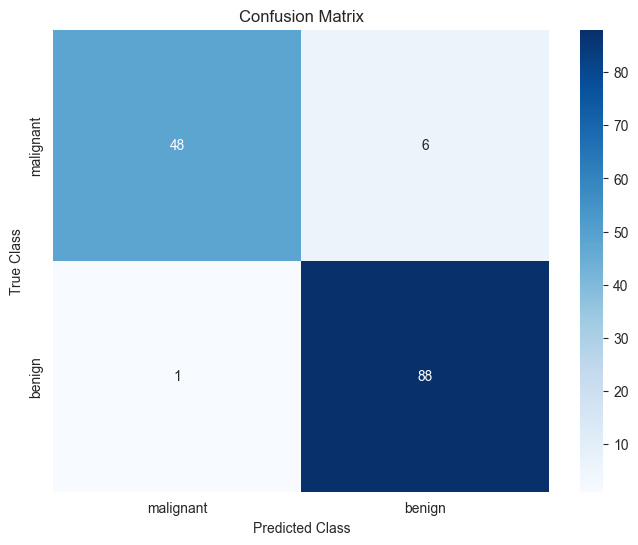

In [239]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Text(0.5, 0, 'False positive rate')

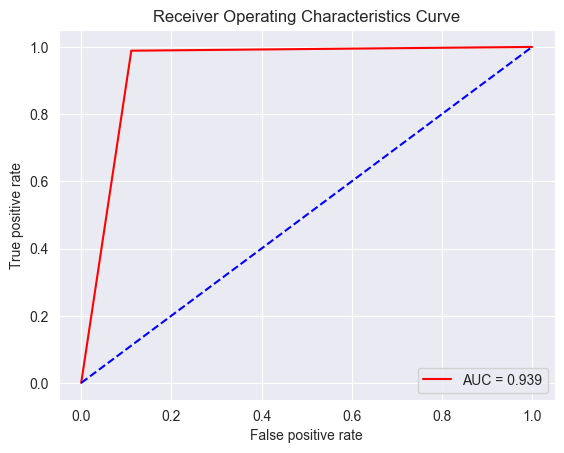

In [240]:
# Plotting The ROC curve

fpr,tpr, threshold = roc_curve(y_test , y_test_pred3)
roc_auc_ = auc(fpr,tpr)
plt.title('Receiver Operating Characteristics Curve')
plt.plot(fpr,tpr,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### K-Nearest Neighbor:

In [241]:
knn = neighbors.KNeighborsClassifier()

model4 = knn.fit(x_train , y_train)
y_test_pred4 = model4.predict(x_test)

cm = confusion_matrix(y_test , y_test_pred4)

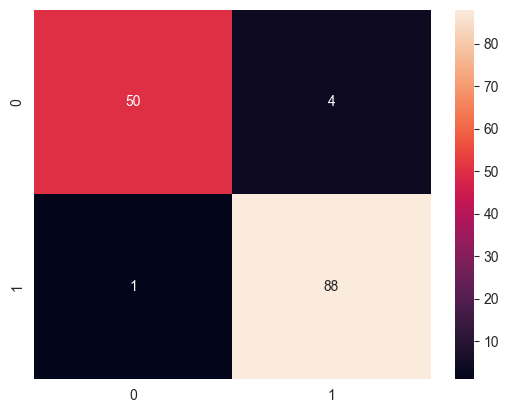

In [242]:
sns.heatmap(cm , annot = True)
plt.savefig("h.png")

In [243]:
accuracy = accuracy_score(y_test , y_test_pred4)
precision = precision_score(y_test , y_test_pred4 , average = 'weighted')
recall = recall_score(y_test , y_test_pred4 , average = 'weighted')
f1 = f1_score(y_test , y_test_pred4 , average = 'weighted')

In [244]:
report = classification_report(y_test , y_test_pred4 , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  96.50%
Precision =  96.55%
Recall =  96.50%
F1 - Score =  96.48%

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        54
      benign       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



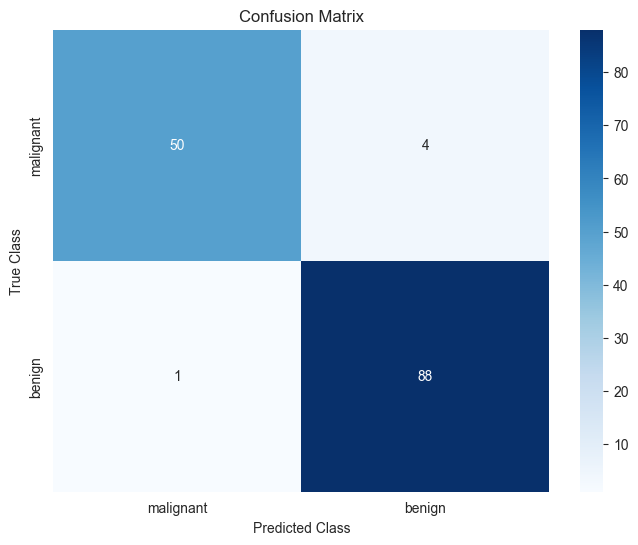

In [245]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Text(0.5, 0, 'False positive rate')

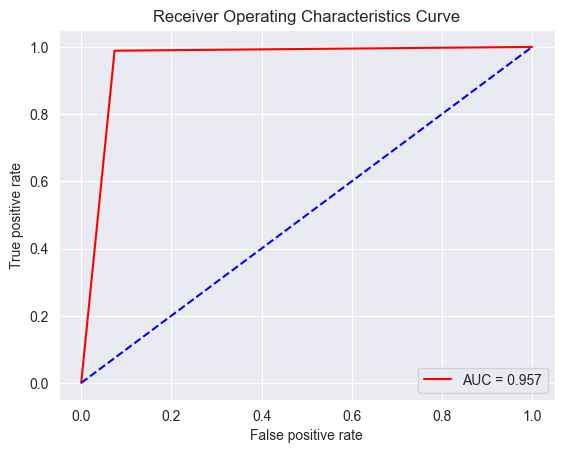

In [246]:
# Plotting The ROC curve

fpr,tpr, threshold = roc_curve(y_test , y_test_pred4)
roc_auc_ = auc(fpr,tpr)
plt.title('Receiver Operating Characteristics Curve')
plt.plot(fpr,tpr,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

### SFFS:

In [247]:
sffs = SequentialFeatureSelector(knn , n_features_to_select = 5)
sffs_model = sffs.fit(x , y)
sffs_model.get_support()
sffs_model_trans = sffs_model.transform(x)
sffs_model_trans.shape

sffs_df = pd.DataFrame(data = sffs_model_trans
             , columns = ['sffs1' , 'sffs2' , 'sffs3' , 'sffs4' , 'sffs5'])

In [248]:
final_df = pd.concat([sffs_df, df[['target']]], axis = 1)

In [249]:
final_df

sffs1    sffs2   sffs3    sffs4   sffs5  target
0    0.14710  0.05373  25.380  0.16220  0.7119       0
1    0.07017  0.01860  24.990  0.12380  0.2416       0
2    0.12790  0.03832  23.570  0.14440  0.4504       0
3    0.10520  0.05661  14.910  0.20980  0.6869       0
4    0.10430  0.05688  22.540  0.13740  0.4000       0
..       ...      ...     ...      ...     ...     ...
564  0.13890  0.05198  25.450  0.14100  0.4107       0
565  0.09791  0.03950  23.690  0.11660  0.3215       0
566  0.05302  0.04730  18.980  0.11390  0.3403       0
567  0.15200  0.07117  25.740  0.16500  0.9387       0
568  0.00000  0.00000   9.456  0.08996  0.0000       1

[569 rows x 6 columns]

In [253]:
x2 = final_df.drop(columns = "target").copy()
y2 = final_df["target"]

In [254]:
x2_train , x2_test , y2_train , y2_test = train_test_split(x2 , y2 , test_size = 0.25 , random_state = 33)

In [269]:
knn_score = knn.score(x2_train , y2_train)
print(f"KNN Score is:{(knn_score * 100) : .2f}%")

KNN Score is: 93.43%


In [257]:
ne_neighbors = range(1 , 15)
training_accuracy = []
testing_accuracy = []

for n in ne_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors = n)
    knn.fit(x2_train , y2_train)
    training_accuracy.append(knn.score(x2_train , y2_train))
    testing_accuracy.append(knn.score(x2_test , y2_test))

[]

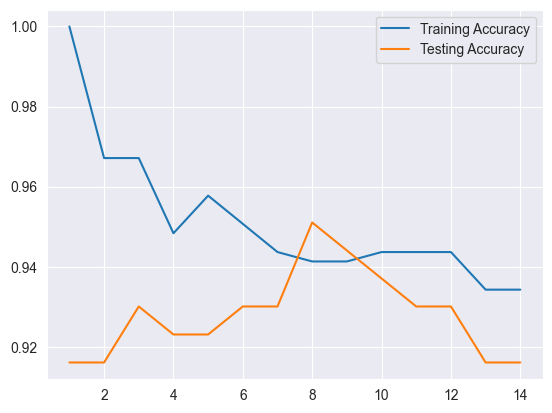

In [258]:
plt.plot(ne_neighbors , training_accuracy , label = "Training Accuracy")
plt.plot(ne_neighbors , testing_accuracy , label = "Testing Accuracy")
plt.legend()
plt.plot()

In [259]:
training_accuracy[13]

0.9342723004694836

In [260]:
testing_accuracy[13]

0.916083916083916

In [261]:
models = [("KNN", neighbors.KNeighborsClassifier()), ("NB", GaussianNB()), ("SVM", SVC())]

In [262]:
# Evaluate Each Model

results = []
names = []
for name , model in models:
  kfold = KFold(n_splits = 10 , random_state = 40 , shuffle = True)
  cv_results = cross_val_score(model , x2_train , y2_train , cv = kfold , scoring = "accuracy")
  results.append(cv_results)
  names.append(name)
  
  msg = '%s: , %f , (%f)' % (name , cv_results.mean() , cv_results.std())
  print(msg)

KNN: , 0.925083 , (0.038583)
NB: , 0.946069 , (0.040853)
SVM: , 0.917885 , (0.045968)


### Support Vector Machine:

In [263]:
# Make Predictions On Test Datasets
svm = SVC()

model5 = svm.fit(x2_train , y2_train)
predictions = model5.predict(x2_test)

cm = confusion_matrix(y2_test , predictions)

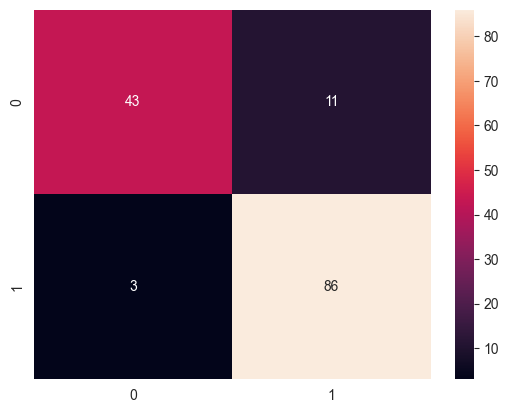

In [264]:
sns.heatmap(cm , annot = True)
plt.savefig("h.png")

In [265]:
accuracy = accuracy_score(y2_test , predictions)
precision = precision_score(y2_test , predictions , average = 'weighted')
recall = recall_score(y2_test , predictions , average = 'weighted')
f1 = f1_score(y2_test , predictions , average = 'weighted')

In [266]:
report = classification_report(y_test , predictions , target_names = data["target_names"])
print(f"Accuracy = {accuracy * 100 : .2f}%")
print(f"Precision = {precision * 100 : .2f}%")
print(f"Recall = {recall * 100 : .2f}%")
print(f"F1 - Score = {f1 * 100 : .2f}%")
print("\nClassification Report:\n" , report)

Accuracy =  90.21%
Precision =  90.48%
Recall =  90.21%
F1 - Score =  90.03%

Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.80      0.86        54
      benign       0.89      0.97      0.92        89

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143



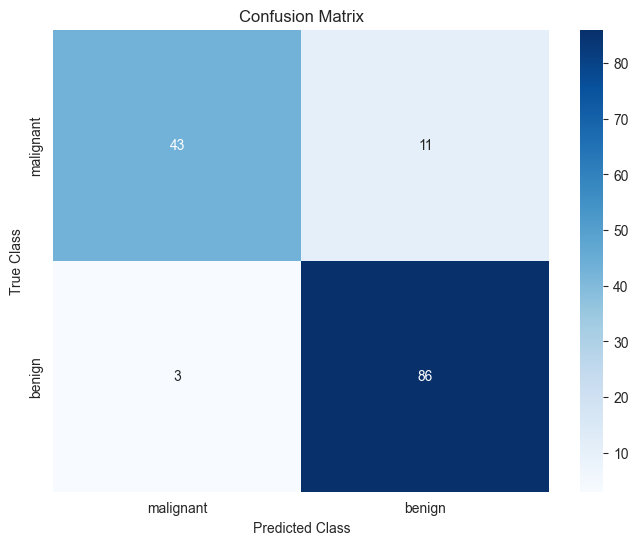

In [267]:
plt.figure(figsize=(8 , 6))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = "Blues" , xticklabels = data["target_names"] , yticklabels = data["target_names"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Text(0.5, 0, 'False positive rate')

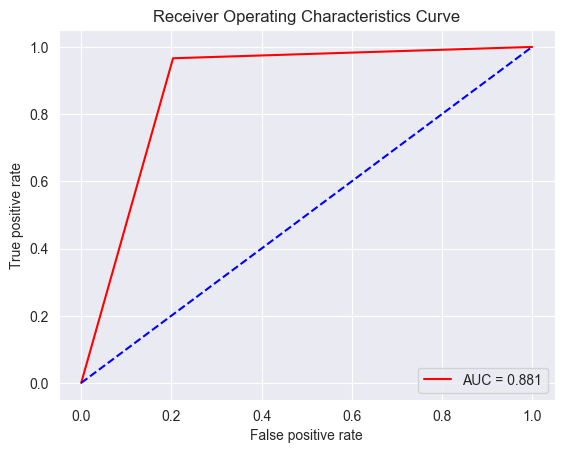

In [268]:
# plotting the ROC curve

fpr,tpr, threshold = roc_curve(y2_test , predictions)
roc_auc_ = auc(fpr,tpr)
plt.title('Receiver Operating Characteristics Curve')
plt.plot(fpr,tpr,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')